1. 데이터를 탐색하고 탐색 결과를 제시하시오.

In [50]:
import pandas as pd

data = pd.read_csv('hotel_bookings.csv')
data.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


데이터는 수치형 데이터와 범주형데이터로 이루어져 있는 것을 확인

In [52]:
data.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [53]:
data.deposit_type.describe()

count          20000
unique             3
top       No Deposit
freq           19138
Name: deposit_type, dtype: object

In [54]:
data.groupby(data['deposit_type']).mean()['adr']

deposit_type
No Deposit    101.965190
Non Refund     89.689476
Refundable     67.456154
Name: adr, dtype: float64

- 1. 결측치 존재 여부 : 데이터 탐색 결과 결측치가 존재하는 변수는 3개이며, 결측치의 개수는 총 1426개이다. 결측치가 존재하는 변수들은 비율과 분포에 따라 각각 다른 결측치 대체 방식을 사용할 수 있을 것으로 보인다. 

- 2. 데이터 타입 설명 : 종속변수는 int, 독립변수는 int, float, object형으로 구성되어 있다. object타입은 인코딩을 통해 변환해줄 필요가 있어보인다. 

- 3. 종속변수 특징 : object형 데이터로 구성된 deposit_type변수는 20000개 관측치 중 19171개의 관측치가 'No Deposit'에 해당한다. 또한 deposit_type별 adr평균이 다르게 나타났는데, No Deposit의 평균 adr 은 약 101, None Refund의 평균 adr은 약 90, Refundable의 평균 adr은 약 69이다. 

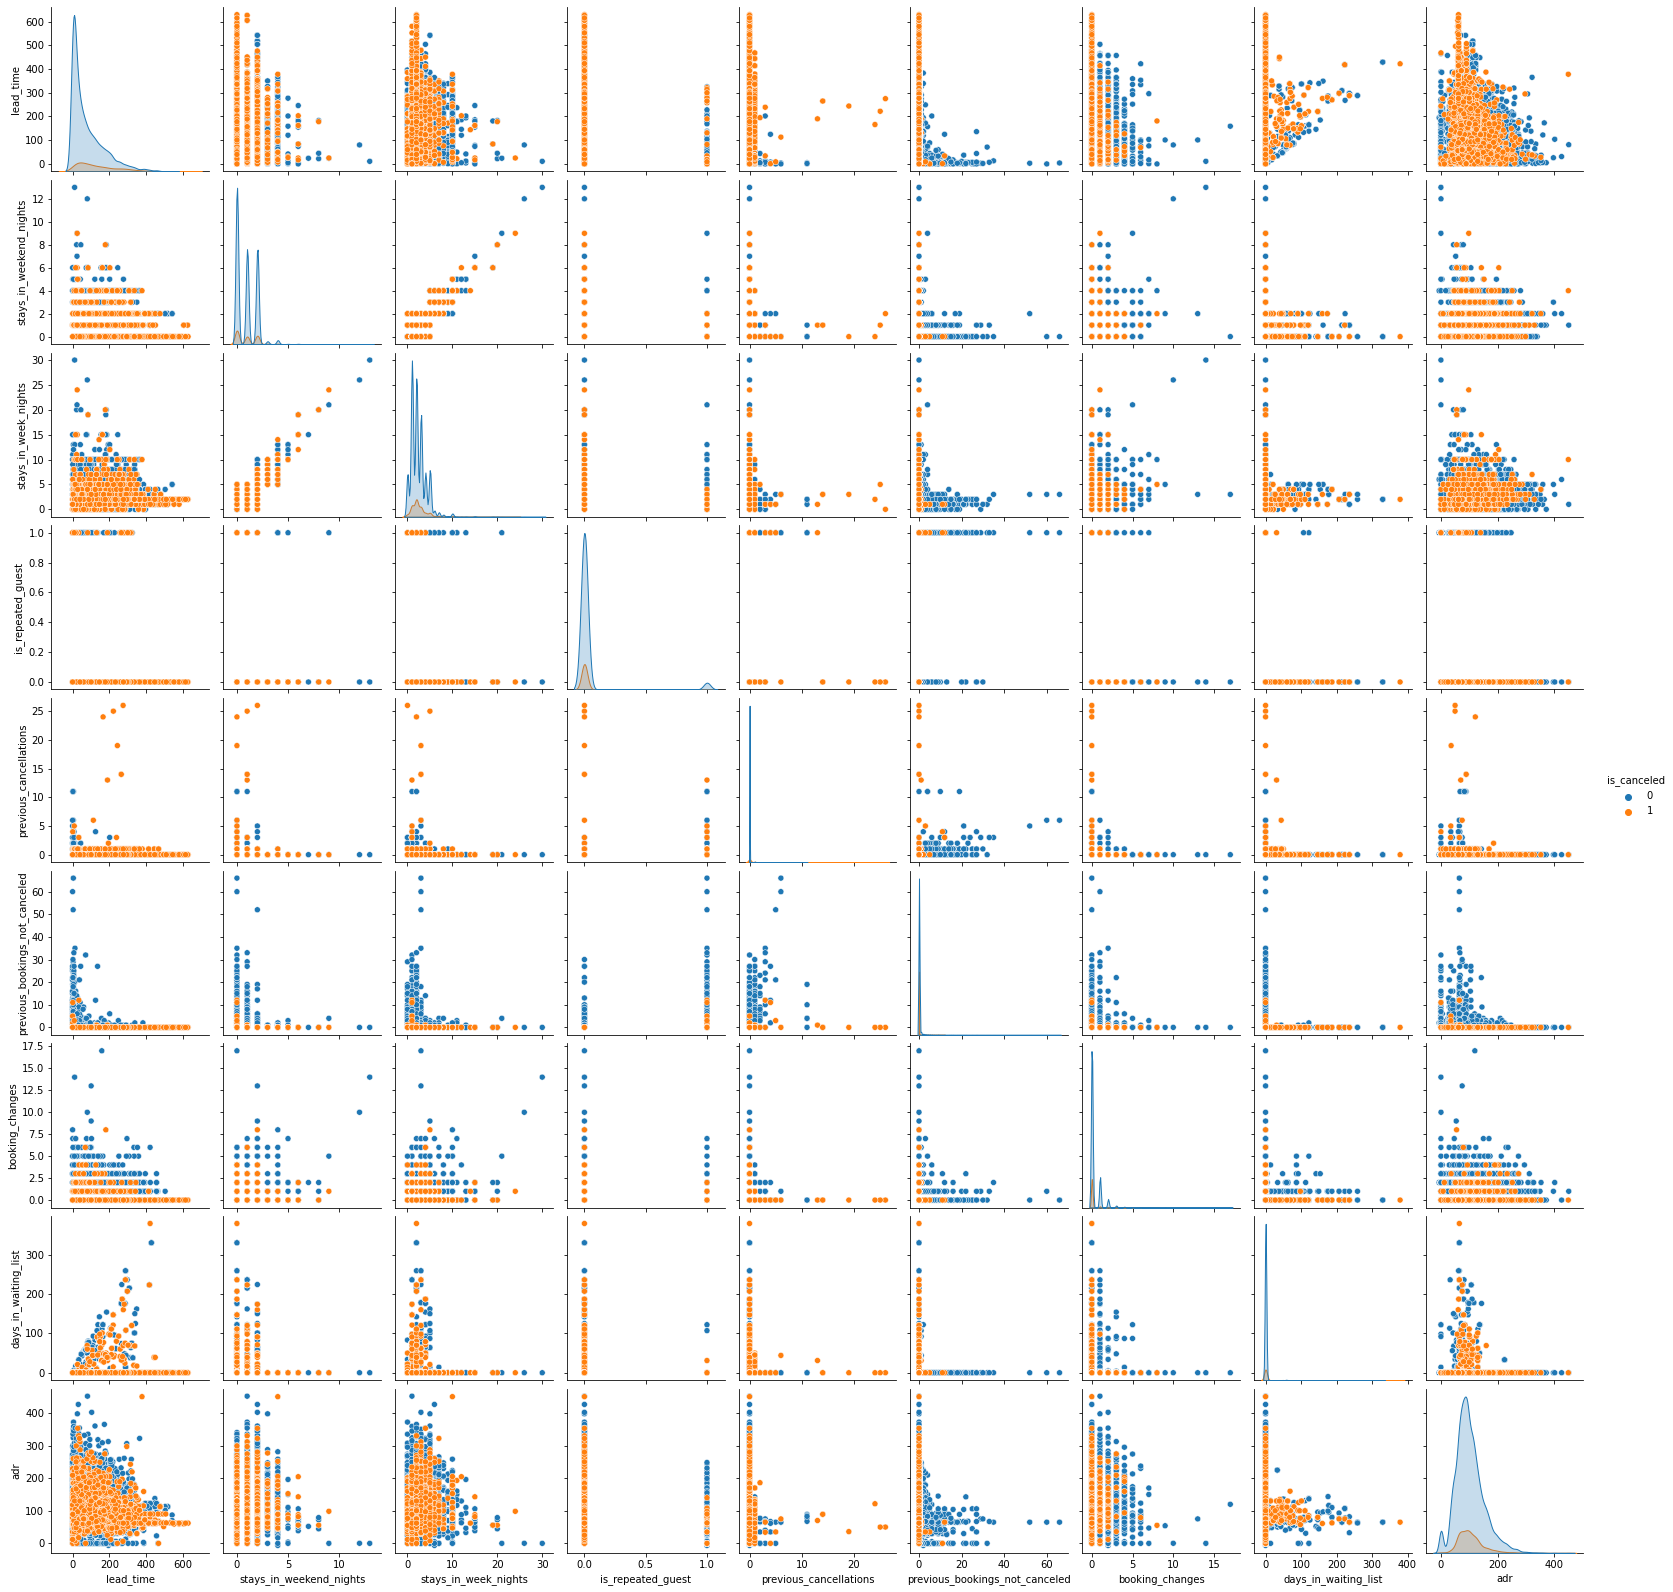

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, diag_kind='auto', hue= 'is_canceled')
plt.show()

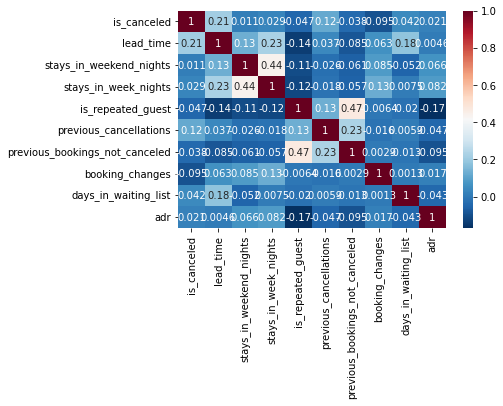

In [25]:
#상관관계 
data_corr = data.corr(method='pearson')
sns.heatmap(data_corr,
            xticklabels=data_corr.columns,
            yticklabels=data_corr.columns,
            cmap='RdBu_r',
            annot=True)
plt.show()

모든 상관계수가 0.9 이하이므로 다중공선성은 없다고 판단

2. 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [55]:
data.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

'lead_time', 'is_repeatred_guest', 'adr' 변수에 결측치가 존재하는 것을 확인

-> lead_time 변수는 결측치가 1% 미만이므로 결측치가 있는 행을 삭제, 


-> is_repeated_guest 변수는 binary타입이므로 결측치는 최빈값으로 대체


-> adr 변수의 결측치는 deposit_type별 평균 adr로 대체

In [60]:
hotel_nonull = data

#leadtime 결측치 제거
hotel_nonull.dropna(subset=['lead_time'], axis=0, inplace=True)

#is_repeated 최빈값 대체
hotel_nonull['is_repeated_guest'] = hotel_nonull['is_repeated_guest'].fillna(hotel_nonull['is_repeated_guest'].mode())

#adr그룹별 평균으로 대체 
fill_mean_func = lambda g : g.fillna(g.mean())
hotel_nonull = hotel_nonull.groupby('deposit_type').apply(fill_mean_func)


hotel_nonull.sort_index(inplace=True)

hotel_nonull.isna().sum()

C:\Users\suhye\AppData\Local\Temp\ipykernel_18428\3066817149.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fill_mean_func = lambda g : g.fillna(g.mean())


is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

3. 데이터의 질을 향상시킬 수 있는 방법을 제안하시오.

IQR 방식으로 lead_time 변수의 이상치를 보정해주어 극단적인 값을 제거함으로써 모델에 특정 값이 영향을 주는 경우를 방지한다. 또는 is_repeated_guest 변수에서 1에 해당하는 데이터를 더 수집해 해당 변수의 불균형을 해소한다. 

4. 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

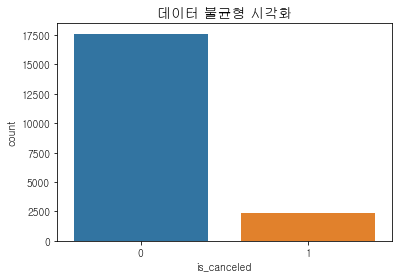

0 비율 : 88.0 %
1 비율 : 12.0%


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_path = 'C:\Windows\Fonts\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

sns.countplot(x='is_canceled',data=hotel_nonull)
plt.title('데이터 불균형 시각화',fontsize=14)
plt.show()

ratio0 = round(len(hotel_nonull[hotel_nonull['is_canceled'] == 0]) / len(hotel_nonull) * 100 , 2)
ratio1 = round(len(hotel_nonull[hotel_nonull['is_canceled'] == 1]) / len(hotel_nonull) * 100, 2)
print('0 비율 : {} %'.format(ratio0))
print('1 비율 : {}%'.format(ratio1))

is_canceled 변수는 0과 1로 구성된 binary 형태의 데이터이다. 0인 데이터와 1인 데이터가 각각 88 : 12 비율이므로 0인 데이터가 전체 데이터의 90% 가까이 차지한다. 0인 관측값 수와 1인 관측값 수가 균등하게 분포하지 않기 때문에, 해당 데이터는 불균형한 데이터이다.

is_canceled 변수의 데이터 값은 0 또는 1로 구성되어 있는데, is_canceled가 0인 데이터의 수는 17600개이지만 1인 데이터의 수는 2400개로 현저히 낮은 것을 알 수 있다. 

5. 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

오버 샘플링은 소수의 레이블을 지닌 데이터셋을 다수 레이블을 지닌 데이터셋의 수 만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다. 데이터의 손실이 없어 언더 샘플링보다 성능이 유리하여 주로 사용된다.

- 랜덤 오버 샘플링 : 소수의 레이블을 지닌 데이터셋을 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다. 데이터를 단순 복제하기 때문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있다. 오버피팅의 위험성이 있지만 불균형 문제를 처리하지 않는것 보다는 유효하기 때문에 사용된다. 또한 SMOTE 기법보다 빠르게 학습 가능하다. 

- SMOTE : 소수 레이블을 지닌 데이터셋의 관측 값에 대해 K개의 최근접 이웃을 찾고 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법이다. 

6. 기법을 선정한 이유를 작성하고, 원데이터를 포함하여 3개의 데이터셋을 구성하시오.

오버 샘플링 방식으로 Random Oversampling과 SMOTE를 선택한다. 그 이유는 Random OverSampling은 간단한 방식으로 데이터 불균형 문제를 해결할 수 있기 때문이다. SMOTE는 데이터를 생성할 때 과적합 문제를 방지할 수 있다는 점에서 선택하였다. 

속도 측면 : 랜덤오버 샘플링, 과적합 방지 : SMOTE

In [72]:
# Onehot Encoding
hotel_nonull = pd.get_dummies(hotel_nonull)

from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

#원본
x = hotel_nonull[hotel_nonull.columns.difference(['is_canceled'])]
y = hotel_nonull['is_canceled']

start = time.time()

# Random OverSamplig
ros = RandomOverSampler(random_state=42)
x_ro, y_ro = ros.fit_resample(x,y)
print('time : ',time.time() - start)

time :  0.05303788185119629


In [73]:
start = time.time()

#SMOTE
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x,y)
print('time : ',time.time() - start)

time :  0.07949399948120117


7. 오버 샘플링 데이터와 원 데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고 그 이유를 선정하시오.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

start = time.time()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=100)

clf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf.fit(x_train, y_train)

print('train 정확도 : ',clf.score(x_train,y_train))

pred = clf.predict(x_test)
print('test 정확도 : ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print('time : ',time.time() - start)

train 정확도 :  0.9334833708427107
test 정확도 :  0.9317329332333083
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3519
           1       0.98      0.44      0.61       480

    accuracy                           0.93      3999
   macro avg       0.96      0.72      0.78      3999
weighted avg       0.94      0.93      0.92      3999

time :  2.333935022354126


In [76]:
# Random Over Samplig
start = time.time()
x_ro_train, x_ro_test, y_ro_train, y_ro_test = train_test_split(x_ro, y_ro, test_size=0.2, stratify=y_ro, random_state=100)

clf_ro = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_ro.fit(x_ro_train, y_ro_train)

print('train 정확도 : ',clf_ro.score(x_ro_train,y_ro_train))
pred_ro = clf_ro.predict(x_ro_test)

print('test 정확도 : ',accuracy_score(y_ro_test,pred_ro))
print(classification_report(y_ro_test,pred_ro))
print('time :',time.time() - start)

train 정확도 :  0.9849744245524297
test 정확도 :  0.9526854219948849
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3519
           1       0.93      0.98      0.95      3519

    accuracy                           0.95      7038
   macro avg       0.95      0.95      0.95      7038
weighted avg       0.95      0.95      0.95      7038

time : 3.095400810241699


In [77]:
# SMOTE
start = time.time()
x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(x_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=100)

clf_sm = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_sm.fit(x_sm_train, y_sm_train)

print('train 정확도 : ',clf_sm.score(x_sm_train,y_sm_train))
pred_sm = clf_sm.predict(x_sm_test)

print('test 정확도 : ',accuracy_score(y_sm_test,pred_sm))
print(classification_report(y_sm_test,pred_sm))
print('time :',time.time() - start)

train 정확도 :  0.9648692810457516
test 정확도 :  0.8927252060244387
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3519
           1       0.91      0.87      0.89      3519

    accuracy                           0.89      7038
   macro avg       0.89      0.89      0.89      7038
weighted avg       0.89      0.89      0.89      7038

time : 4.229342699050903


정확도 측면에서는 SMOTE, 속도 측면에서는 RandomOverSmplig을 선정한다. 속도 측면에서는 원본 데이터의 수행속도가 가장 빠르지만, 이는 데이터가 오버 샘플링 데이터에 비해 사이즈가 작기 때문이다. 

여기서 부터 내가 짠 거

In [29]:
#원데이터 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#범주형변수 더미 변환
data = pd.get_dummies(data,columns=['deposit_type'],drop_first=True)

#train/test 분할
x = data.drop(columns=['is_canceled'])
y = data[['is_canceled']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y)


#정규화
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [30]:
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy=0.5)
x_over , y_over = oversample.fit_resample(x,y)

print(Counter(y_over['is_canceled']))

Counter({0: 17600, 1: 8800})


In [32]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x,y)
print(Counter(y_sm['is_canceled']))

Counter({0: 17600, 1: 17600})


7. 오버 샘플링 데이터와 원 데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고 그 이유를 선정하시오.

정확도 : 랜덤포레스트
속도 : 로지스틱회귀

In [42]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import time


def logistic(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y)
    scaler = StandardScaler()
    x_scaled_train = scaler.fit_transform(x_train)
    x_scaled_test = scaler.transform(x_test)
    
    start = time.time()
    
    lr = LogisticRegression()
    lr.fit(x_scaled_train,y_train)
    lr_pred = lr.predict(x_scaled_test)
    
    end = time.time()
    
    print('score : ',accuracy_score(y_test,lr_pred))
    print('Confusion Matrix : \n',confusion_matrix(y_test,lr_pred))
    print('Time : {:.4f}'.format((end-start)))

In [43]:
#원데이터
logistic(x,y)

score :  0.9236666666666666
Confusion Matrix : 
 [[5269   11]
 [ 447  273]]
Time : 0.0785


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
# Random Over Samplig
logistic(x_over,y_over)

score :  0.7912878787878788
Confusion Matrix : 
 [[5236   44]
 [1609 1031]]
Time : 0.0628


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
# SMOTE
logistic(x_sm,y_sm)

score :  0.7003787878787879
Confusion Matrix : 
 [[4215 1065]
 [2099 3181]]
Time : 0.1200


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def rf(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.3)
    scaler = StandardScaler()
    
    x_scaled_train = scaler.fit_transform(x_train)
    x_scaled_test = scaler.transform(x_test)
    
    rf_clf = RandomForestClassifier()
    param_grid = {'max_depth': [0.1,1,10]}
    
    start = time.time()

    model = GridSearchCV(rf_clf,param_grid=param_grid)
    model.fit(x_scaled_train,y_train)
    pred = model.predict(x_test)
    
    end = time.time()
    
    print('time : {:.4f}'.format(end-start))
    print('Best Parameter : ',model.best_params_)
    print('Accuracy Score : ',accuracy_score(y_test, pred))
    print('Confusion Matrix : \n',confusion_matrix(y_test,pred))
    
       
    
    

In [47]:
#원본 데이터
rf(x,y)

c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

time : 15.1597
Best Parameter :  {'max_depth': 10}
Accuracy Score :  0.816
Confusion Matrix : 
 [[4823  457]
 [ 647   73]]


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [48]:
# RandomOverSamplig
rf(x_over,y_over)

c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

time : 17.2058
Best Parameter :  {'max_depth': 10}
Accuracy Score :  0.7036616161616162
Confusion Matrix : 
 [[5215   65]
 [2282  358]]


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [49]:
# SMOTE
rf(x_sm,y_sm)

c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

time : 25.2467
Best Parameter :  {'max_depth': 10}
Accuracy Score :  0.59375
Confusion Matrix : 
 [[1286 3994]
 [ 296 4984]]


8. 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

원본 데이터로 